In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Import tensornetwork
import tensornetwork as tn
tn.set_default_backend("tensorflow")

In [3]:
from spacetime import SpaceTime, Infer, RobustRegressionTest

## Spacetime Graphs: Examples

### Example 1

#### Arbitrary spacetime graph

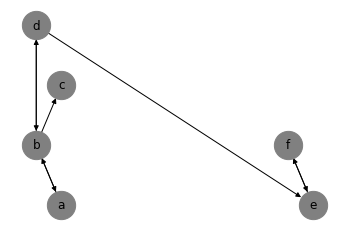

In [4]:
g = SpaceTime(node_dict = {0:['a','b','c','d'],
                           1:['e','f']})
g.add_edge('a','b')
g.add_edge('b','a')
g.add_edge('b','c')
g.add_edge('b','d')
g.add_edge('d','b')
g.add_edge('d','e')
g.add_edge('e','f')
g.add_edge('f','e')
g.draw_graph()

#### Infer time ordering from edges and re-draw graph

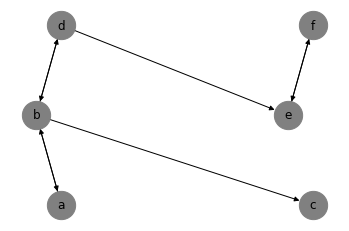

In [5]:
g.infer_order()
g.draw_graph()

### Example 2

#### Spacetime graph with structure

In [6]:
node_dict_1 = dict(zip(range(4), [['x%s_%s'%(i, j) for i in range(3)] for j in range(4)]))
data_1 = pd.DataFrame(columns = [item for sublist in node_dict_1.values() for item in sublist])

node_dict_1
data_1.head()

{0: ['x0_0', 'x1_0', 'x2_0'],
 1: ['x0_1', 'x1_1', 'x2_1'],
 2: ['x0_2', 'x1_2', 'x2_2'],
 3: ['x0_3', 'x1_3', 'x2_3']}

,x0_0,x1_0,x2_0,x0_1,x1_1,x2_1,x0_2,x1_2,x2_2,x0_3,x1_3,x2_3


#### Initialize a graph inferring time-order from node-dictionary

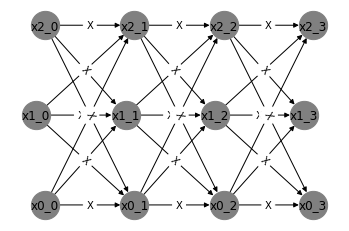

In [7]:
g1 = Infer(SpaceTime(node_dict_1), data_1, algorithm = 'IC', dseparation_test = RobustRegressionTest)
g1.initialize_graph(timing=True)
g1.st.draw_graph()

### Example 3

#### Define unstructured spacetime graph and generate associated toy data

In [8]:
node_dict_2 = {0: ['x0','x1','x2','x3','x4']}

# generate toy data:
SIZE = 2000
x0 = np.random.normal(size=SIZE)
x1 = x0 + np.random.normal(size=SIZE)
x2 = x0 + np.random.normal(size=SIZE)
x3 = x1 + x2 + np.random.normal(size=SIZE)
x4 = x3 + np.random.normal(size=SIZE)

# load the data into a dataframe:
data_2 = pd.DataFrame(dict(zip(node_dict_2[0], [x0,x1,x2,x3,x4])))

#### Initialize and draw graph

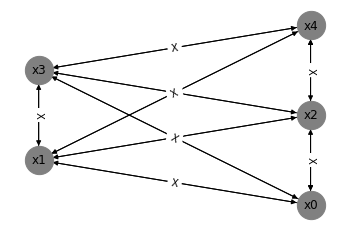

In [9]:
g2 = Infer(SpaceTime(node_dict_2), data_2, algorithm = 'IC', dseparation_test = RobustRegressionTest)
g2.initialize_graph()
g2.st.draw_graph()

#### Perform d-separation test

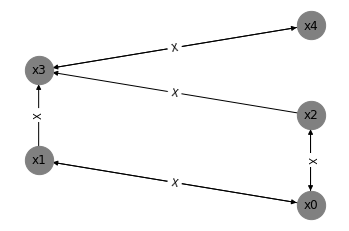

In [10]:
g2.d_separate()
g2.st.draw_graph()

#### Perform latent variable inference

In [11]:
g2.infer_latent()


#### Infer time-ordering from partially directed graph and re-draw

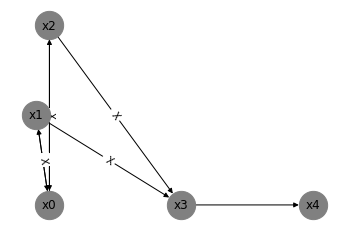

In [12]:
g2.st.infer_order()
g2.st.time_order_nodes()
g2.st.draw_graph()